In [1]:
install.packages("dplyr")
install.packages("caret")
install.packages("e1071")
install.packages("magrittr")
install.packages("pacman")
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("rio")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

als

In [2]:
train<-readRDS("/content/spambase_trn.rds")
test<-readRDS("/content/spambase_tst.rds")

In [3]:
head(train,5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,⋯,A49,A50,A51,A52,A53,A54,A55,A56,A57,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0,0.0,⋯,0.185,0.743,0,0.000,0.000,0.000,4.476,14,94,NotSpam
2,0.00,0.1,0.31,0.1,1.05,0.42,0.00,0.31,0,0.1,⋯,0.000,0.054,0,0.384,0.182,0.201,8.851,299,1726,Spam
3,0.00,0.0,0.00,0.0,0.00,1.21,0.00,0.00,0,0.0,⋯,0.000,0.212,0,0.000,0.000,0.000,1.406,5,45,NotSpam
4,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0,0.0,⋯,0.000,0.000,0,0.000,0.000,0.000,1.600,3,8,NotSpam
5,0.47,0.0,0.94,0.0,0.94,0.00,0.94,0.00,0,0.0,⋯,0.000,0.073,0,1.254,0.221,0.000,5.918,91,219,Spam


In [4]:
head(test,5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,⋯,A49,A50,A51,A52,A53,A54,A55,A56,A57,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
1,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,Spam
2,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,Spam
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,Spam
4,0.06,0.12,0.77,0,0.19,0.32,0.38,0.00,0.06,0.00,⋯,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,Spam
5,0.05,0.07,0.10,0,0.76,0.05,0.15,0.02,0.55,0.00,⋯,0.042,0.101,0.016,0.250,0.046,0.059,2.569,66,2259,Spam


In [6]:
library(caret)

Loading required package: ggplot2

Loading required package: lattice



In [7]:
control_param<-trainControl(method="repeatedcv",number=5,repeats=3)

In [8]:
dt1<-train(y~.,data=train,method="rpart",trControl=control_param,tuneLength = 10)

In [9]:
dt1

CART 

3220 samples
  57 predictor
   2 classes: 'NotSpam', 'Spam' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2576, 2576, 2576, 2576, 2576, 2576, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0048  0.8972050  0.7807920
  0.0064  0.8946170  0.7743248
  0.0068  0.8936853  0.7719400
  0.0080  0.8904762  0.7649010
  0.0088  0.8904762  0.7649010
  0.0096  0.8889234  0.7617424
  0.0296  0.8767081  0.7347973
  0.0436  0.8564182  0.6901485
  0.1456  0.7948240  0.5491478
  0.4696  0.6916149  0.2372836

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0048.

In [11]:
library(magrittr)  # Provides the %>% operator


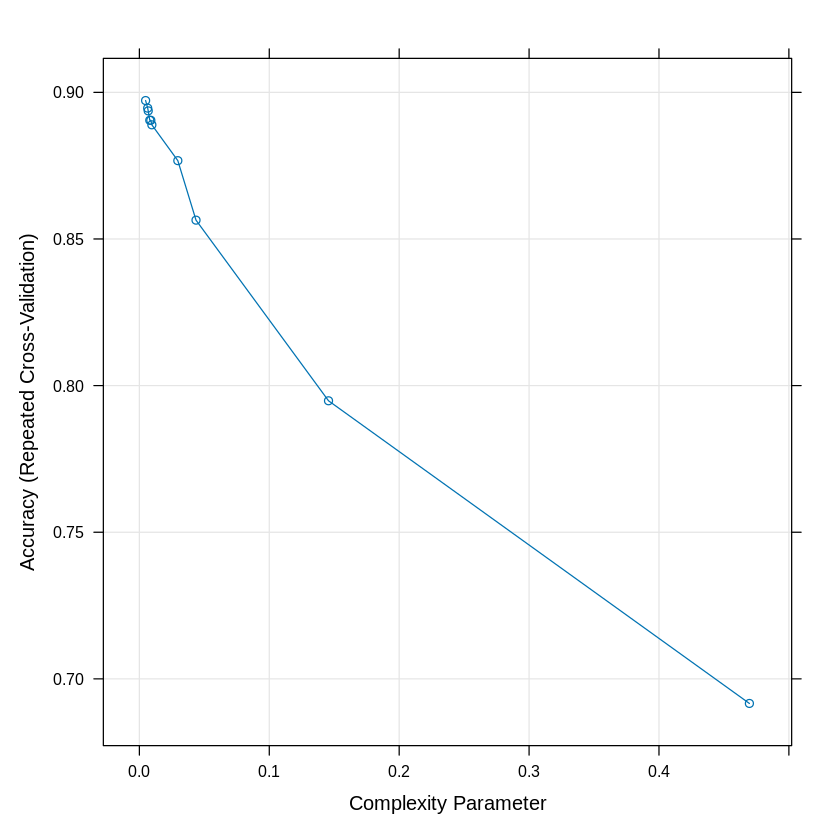

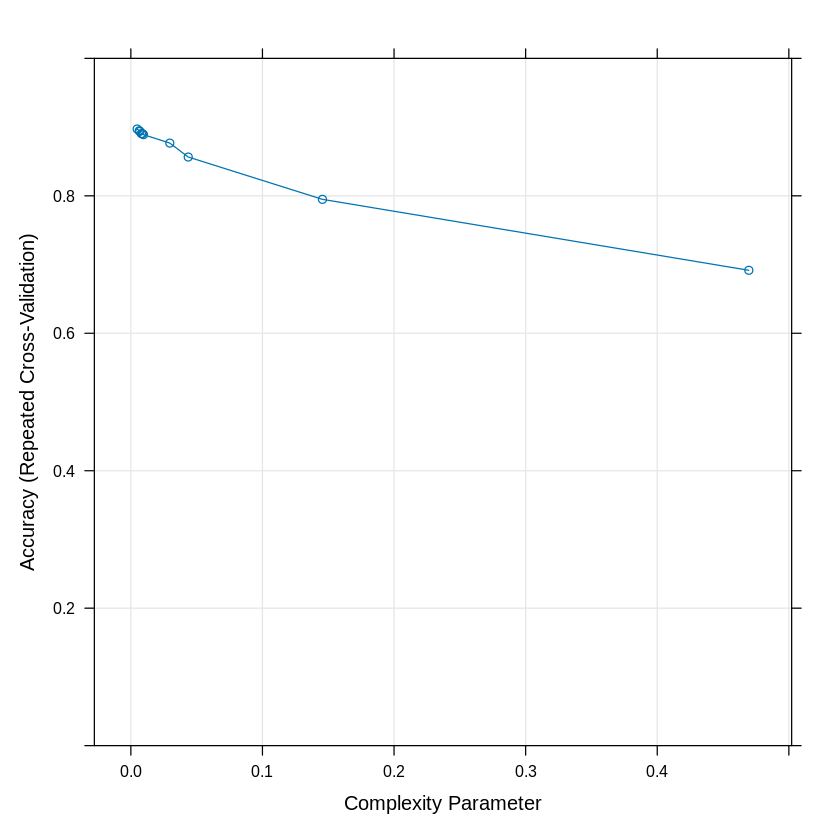

In [12]:
# Plot accuracy by complexity parameter values
dt1 %>% plot()
dt1 %>% plot(ylim = c(0, 1))  # Plot with 0-100% range

In [14]:
# Second method tunes the maximum tree depth
dt2 <- train(
  y ~ .,                  # Use all vars to predict spam
  data = train,             # Use training data
  method = "rpart2",      # Tune the maximum tree depth
  trControl = control_param,  # Control parameters
  tuneLength = 10         # Try ten parameters
)


In [15]:
dt2

CART 

3220 samples
  57 predictor
   2 classes: 'NotSpam', 'Spam' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 2576, 2576, 2576, 2576, 2576, 2576, ... 
Resampling results across tuning parameters:

  maxdepth  Accuracy   Kappa    
   1        0.7841615  0.5243278
   2        0.8341615  0.6393149
   4        0.8702899  0.7223114
   5        0.8795031  0.7407342
   6        0.8834369  0.7494342
   7        0.8874741  0.7582416
   8        0.8876812  0.7587570
  10        0.8878882  0.7592247
  12        0.8878882  0.7592247
  14        0.8878882  0.7592247

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was maxdepth = 10.

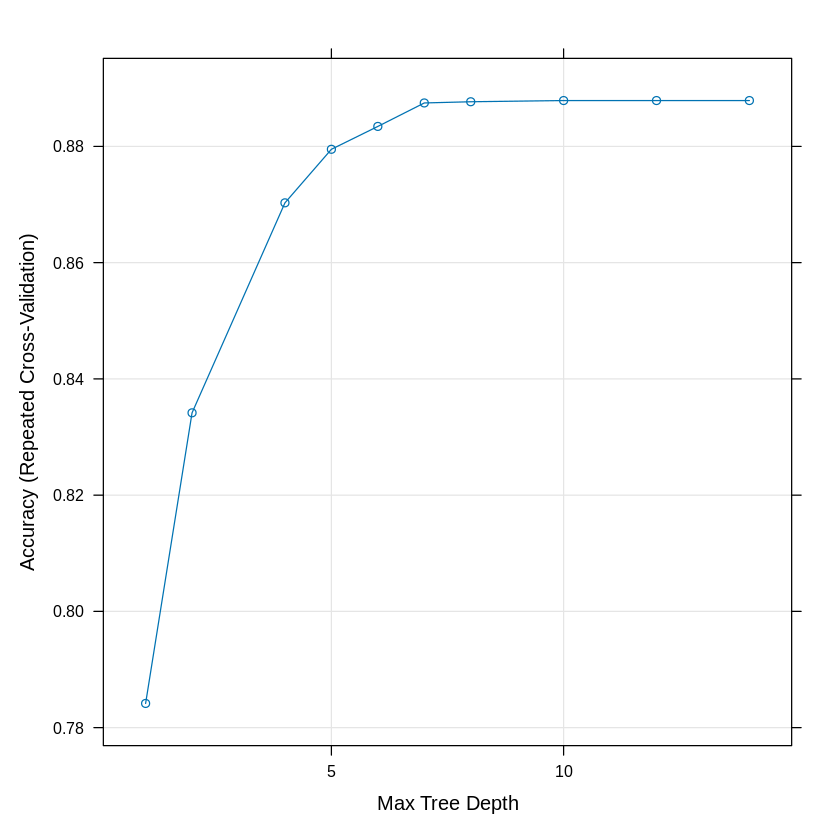

In [16]:
dt2%>%plot()

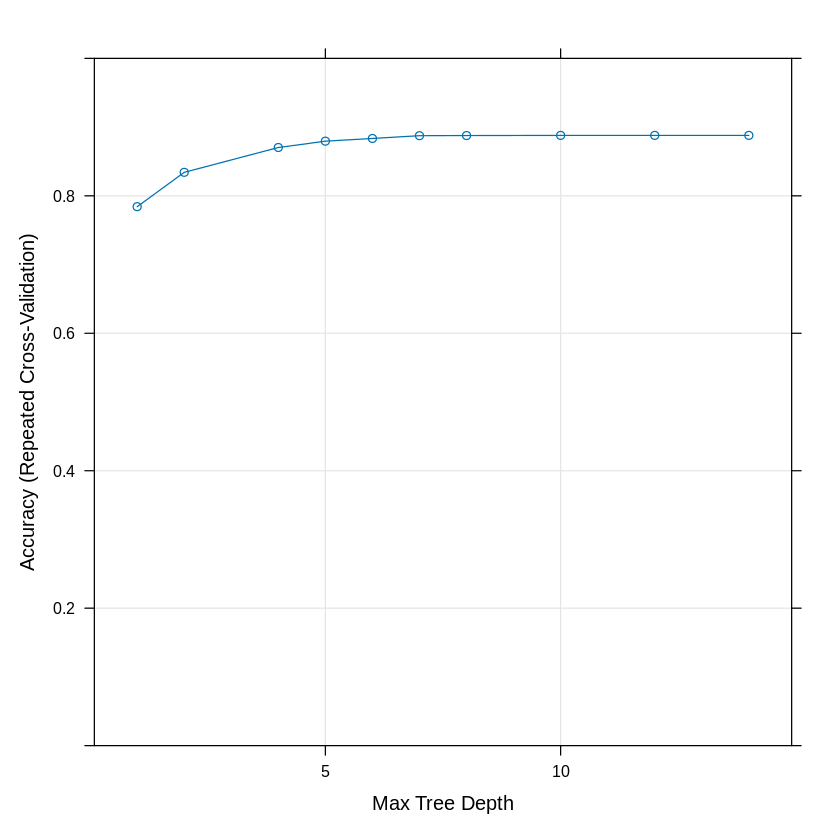

In [17]:
dt2%>%plot(ylim=c(0,1))

In [19]:
final_result<-if (max(dt1$results$Accuracy)>max(dt2$results$Accuracy)){dt1} else {dt2}

In [20]:
final_result$finalModel

n= 3220 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 3220 1250 NotSpam (0.61180124 0.38819876)  
   2) A53< 0.0555 2461  577 NotSpam (0.76554246 0.23445754)  
     4) A7< 0.055 2233  372 NotSpam (0.83340797 0.16659203)  
       8) A52< 0.345 1920  195 NotSpam (0.89843750 0.10156250)  
        16) A16< 0.115 1747  129 NotSpam (0.92615913 0.07384087) *
        17) A16>=0.115 173   66 NotSpam (0.61849711 0.38150289)  
          34) A5< 1.075 144   43 NotSpam (0.70138889 0.29861111)  
            68) A52< 0.1685 110   22 NotSpam (0.80000000 0.20000000) *
            69) A52>=0.1685 34   13 Spam (0.38235294 0.61764706) *
          35) A5>=1.075 29    6 Spam (0.20689655 0.79310345) *
       9) A52>=0.345 313  136 Spam (0.43450479 0.56549521)  
        18) A57< 49.5 138   35 NotSpam (0.74637681 0.25362319)  
          36) A16< 0.98 125   23 NotSpam (0.81600000 0.18400000) *
          37) A16>=0.98 13    1 Spam (0.07692308 0.92307692) *
        19) A57>=49.5 1

In [22]:
install.packages("rattle")
library(rattle)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’, ‘rpart.plot’


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



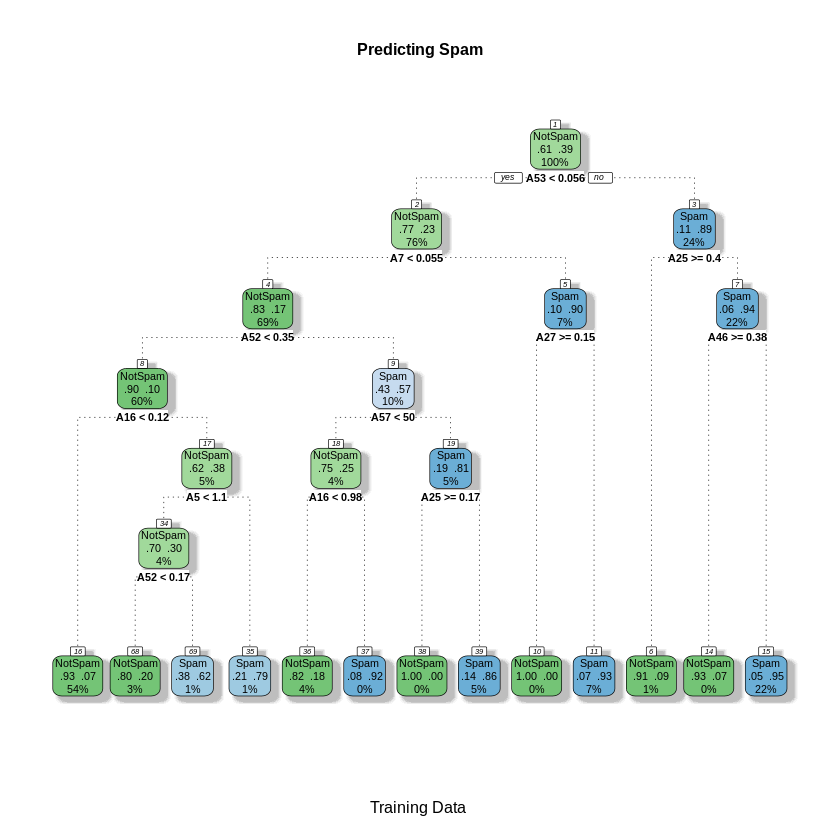

In [24]:
# Plot the final decision tree model
final_result$finalModel %>%fancyRpartPlot(main = "Predicting Spam",sub  = "Training Data")

In [25]:
pred<-final_result%>%predict(newdata=test)

In [26]:
cmtest<-pred%>%confusionMatrix(reference = test$y)

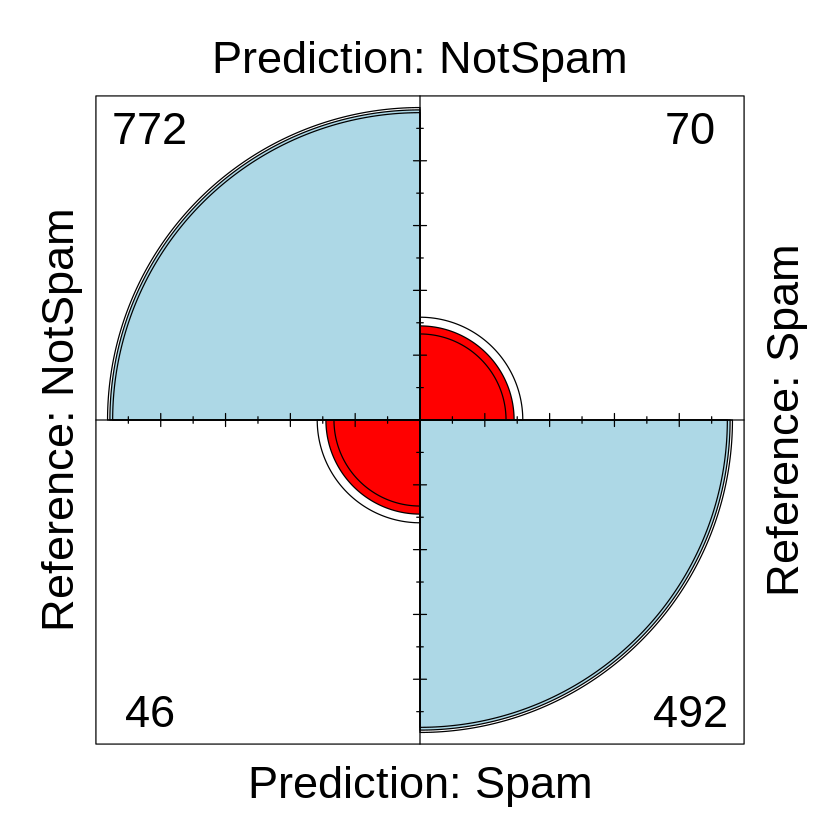

In [27]:
# Plot the confusion matrix
cmtest$table %>% fourfoldplot(color = c("red", "lightblue"))

In [28]:
cmtest%>%print()

Confusion Matrix and Statistics

          Reference
Prediction NotSpam Spam
   NotSpam     772   70
   Spam         46  492
                                     
               Accuracy : 0.9159     
                 95% CI : (0.9, 0.93)
    No Information Rate : 0.5928     
    P-Value [Acc > NIR] : < 2e-16    
                                     
                  Kappa : 0.8247     
                                     
 Mcnemar's Test P-Value : 0.03272    
                                     
            Sensitivity : 0.9438     
            Specificity : 0.8754     
         Pos Pred Value : 0.9169     
         Neg Pred Value : 0.9145     
             Prevalence : 0.5928     
         Detection Rate : 0.5594     
   Detection Prevalence : 0.6101     
      Balanced Accuracy : 0.9096     
                                     
       'Positive' Class : NotSpam    
                                     
